In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [3]:
#If working in colab
#from google.colab import drive
#drive.mount('/content/drive')
#%cd "/content/drive/My Drive"

In [4]:
data = pd.read_csv('car_data.csv')

In [5]:
data.head(5)

,record,name,selling_price,model_year,vehicle_age,km_driven,seats,fuel_type,seller_type,transmission,owner,mileage,engine,max_power,brand
0,1,Maruti Ritz VDi,425000,2016,5,70000,5,4,1,2,1,23.20,1248,73,Maruti
1,2,Hyundai Grand i10 1.2 CRDi Sportz,700000,2018,3,35000,5,4,1,2,1,24.00,1186,73,Hyundai
2,3,Tata Indigo eCS LX BSIV,210000,2011,10,175000,5,4,1,2,2,23.03,1396,69,Tata
3,4,Toyota Etios VX,625000,2017,4,25538,5,3,3,2,1,16.78,1496,88,Toyota
4,5,Tata Hexa XM,1300000,2018,3,35000,7,4,1,2,1,17.60,2179,153,Tata


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7889 entries, 0 to 7888
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   record         7889 non-null   int64  
 1   name           7889 non-null   object 
 2   selling_price  7889 non-null   int64  
 3   model_year     7889 non-null   int64  
 4   vehicle_age    7889 non-null   int64  
 5   km_driven      7889 non-null   int64  
 6   seats          7889 non-null   int64  
 7   fuel_type      7889 non-null   int64  
 8   seller_type    7889 non-null   int64  
 9   transmission   7889 non-null   int64  
 10  owner          7889 non-null   int64  
 11  mileage        7889 non-null   float64
 12  engine         7889 non-null   int64  
 13  max_power      7889 non-null   int64  
 14  brand          7889 non-null   object 
dtypes: float64(1), int64(12), object(2)
memory usage: 924.6+ KB


In [7]:
data.describe()

,record,selling_price,model_year,vehicle_age,km_driven,seats,fuel_type,seller_type,transmission,owner,mileage,engine,max_power
count,7889.00000,7.889000e+03,7889.000000,7889.000000,7.889000e+03,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000
mean,3945.00000,6.496753e+05,2013.987831,7.012169,6.919859e+04,5.418050,3.526556,1.199645,1.868805,1.444290,19.461328,1458.378628,91.226138
std,2277.50247,8.134766e+05,3.863460,3.863460,5.682769e+04,0.958526,0.545669,0.468663,0.337635,0.704751,3.939513,503.299977,35.551901
min,1.00000,2.999900e+04,1994.000000,1.000000,1.000000e+00,4.000000,1.000000,1.000000,1.000000,1.000000,9.000000,624.000000,32.000000
25%,1973.00000,2.700000e+05,2012.000000,4.000000,3.500000e+04,5.000000,3.000000,1.000000,2.000000,1.000000,16.780000,1197.000000,68.000000
50%,3945.00000,4.500000e+05,2015.000000,6.000000,6.000000e+04,5.000000,4.000000,1.000000,2.000000,1.000000,19.330000,1248.000000,82.000000
75%,5917.00000,6.900000e+05,2017.000000,9.000000,9.550000e+04,5.000000,4.000000,1.000000,2.000000,2.000000,22.320000,1582.000000,102.000000
max,7889.00000,1.000000e+07,2020.000000,27.000000,2.360457e+06,14.000000,4.000000,3.000000,2.000000,4.000000,42.000000,3604.000000,282.000000


In [8]:
conditions = [
    (data['engine'] <= 800),
    (data['engine'] >= 801) & (data['engine'] <= 1000),
    (data['engine'] >= 1001) & (data['engine'] <= 1400),
    (data['engine'] >= 1401) & (data['engine'] <= 1600),
    (data['engine'] >= 1601) & (data['engine'] <= 2000),
    (data['engine'] >= 2001) & (data['engine'] <= 3000),
    (data['engine'] >= 3001) & (data['engine'] <= 5000)]
classes = ['micro', 'mini', 'compact', 'C1C2', 'DF', 'E', 'DF']

#Create new column 'class' based on conditions
data['class'] = np.select(conditions, classes, default='Unknown')
data

,record,name,selling_price,model_year,vehicle_age,km_driven,seats,fuel_type,seller_type,transmission,owner,mileage,engine,max_power,brand,class
0,1,Maruti Ritz VDi,425000,2016,5,70000,5,4,1,2,1,23.20,1248,73,Maruti,compact
1,2,Hyundai Grand i10 1.2 CRDi Sportz,700000,2018,3,35000,5,4,1,2,1,24.00,1186,73,Hyundai,compact
2,3,Tata Indigo eCS LX BSIV,210000,2011,10,175000,5,4,1,2,2,23.03,1396,69,Tata,compact
3,4,Toyota Etios VX,625000,2017,4,25538,5,3,3,2,1,16.78,1496,88,Toyota,C1C2
4,5,Tata Hexa XM,1300000,2018,3,35000,7,4,1,2,1,17.60,2179,153,Tata,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7884,7885,Tata Manza Aura Quadrajet,250000,2009,12,43000,5,4,1,2,1,18.80,1248,90,Tata,compact
7885,7886,Maruti Eeco 7 Seater Standard BSIV,270000,2016,5,100000,7,3,1,2,3,15.37,1196,73,Maruti,compact
7886,7887,Mahindra Bolero Power Plus ZLX,700000,2016,5,103000,7,4,1,2,1,16.50,1493,70,Mahindra,C1C2
7887,7888,Maruti Wagon R VXI BS IV,400000,2017,4,65000,5,3,1,2,2,20.51,998,67,Maruti,mini


In [9]:
#Count the frequency of each class
class_counts = data['class'].value_counts()

#Create a DataFrame to display the counts
class_counts_df = pd.DataFrame(class_counts.reset_index())
class_counts_df.columns = ['Class', 'Frequency']

class_counts_df

,Class,Frequency
0,compact,3421
1,C1C2,1464
2,E,1196
3,mini,759
4,micro,553
5,DF,496


In [10]:
#Value 1 is CNG, 2 is LPG, 3 is Petrol, 4 is Diesel
#Merge 1 and 2 as 2 together because both can be categorised as biofuel
data['fuel_type'] = data['fuel_type'].replace({1: 2})
data.groupby(['fuel_type']).size().reset_index(name='Frequency')

,fuel_type,Frequency
0,2,87
1,3,3509
2,4,4293


In [11]:
#Merge seats categorisation, especially for uncommon seaters
data['seats'] = data['seats'].replace({6: 7})
data['seats'] = data['seats'].replace({8: 7})
data['seats'] = data['seats'].replace({10: 9})
data.groupby(['seats']).size().reset_index(name='Frequency')

,seats,Frequency
0,4,133
1,5,6239
2,7,1417
3,9,99
4,14,1


In [12]:
#Count the frequency of combinations of class and seats
class_seat_counts = data.groupby(['class', 'seats']).size().reset_index(name='Frequency').sort_values(by=['class', 'seats'])

print(class_seat_counts)

      class  seats  Frequency
0      C1C2      5       1305
1      C1C2      7        159
2        DF      4          5
3        DF      5        433
4        DF      7         46
5        DF      9         11
6        DF     14          1
7         E      4          8
8         E      5        163
9         E      7        937
10        E      9         88
11  compact      5       3182
12  compact      7        239
13    micro      4        119
14    micro      5        410
15    micro      7         24
16     mini      4          1
17     mini      5        746
18     mini      7         12


In [13]:
data['km_driven'] = pd.to_numeric(data['km_driven'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7889 entries, 0 to 7888
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   record         7889 non-null   int64  
 1   name           7889 non-null   object 
 2   selling_price  7889 non-null   int64  
 3   model_year     7889 non-null   int64  
 4   vehicle_age    7889 non-null   int64  
 5   km_driven      7889 non-null   int64  
 6   seats          7889 non-null   int64  
 7   fuel_type      7889 non-null   int64  
 8   seller_type    7889 non-null   int64  
 9   transmission   7889 non-null   int64  
 10  owner          7889 non-null   int64  
 11  mileage        7889 non-null   float64
 12  engine         7889 non-null   int64  
 13  max_power      7889 non-null   int64  
 14  brand          7889 non-null   object 
 15  class          7889 non-null   object 
dtypes: float64(1), int64(12), object(3)
memory usage: 986.2+ KB


# EDA

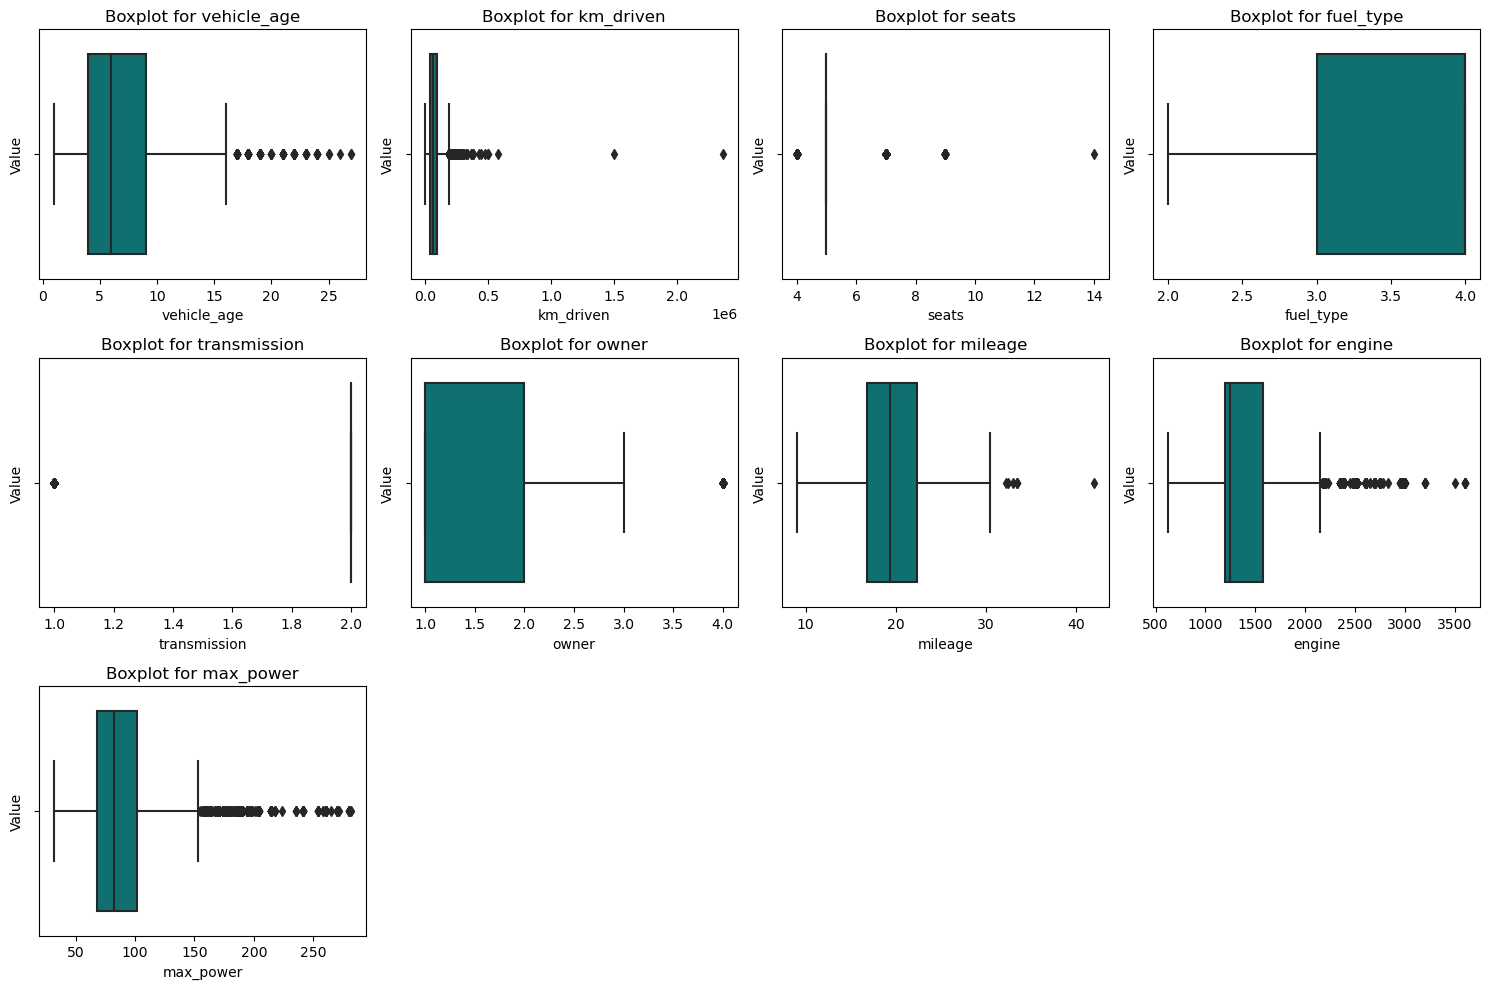

In [14]:
#Use boxplot to see the distribution for numerical data
#[['vehicle_age', 'km_driven', 'seats', 'fuel_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power']]
variables = ['vehicle_age', 'km_driven', 'seats', 'fuel_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power']
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=variable, data=data, color='teal')
    plt.title(f'Boxplot for {variable}')
    plt.xlabel(variable)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [15]:
#Dropping a variable due to input errors
data = data[data['name'] != 'Volvo XC90 T8 Excellence BSIV']

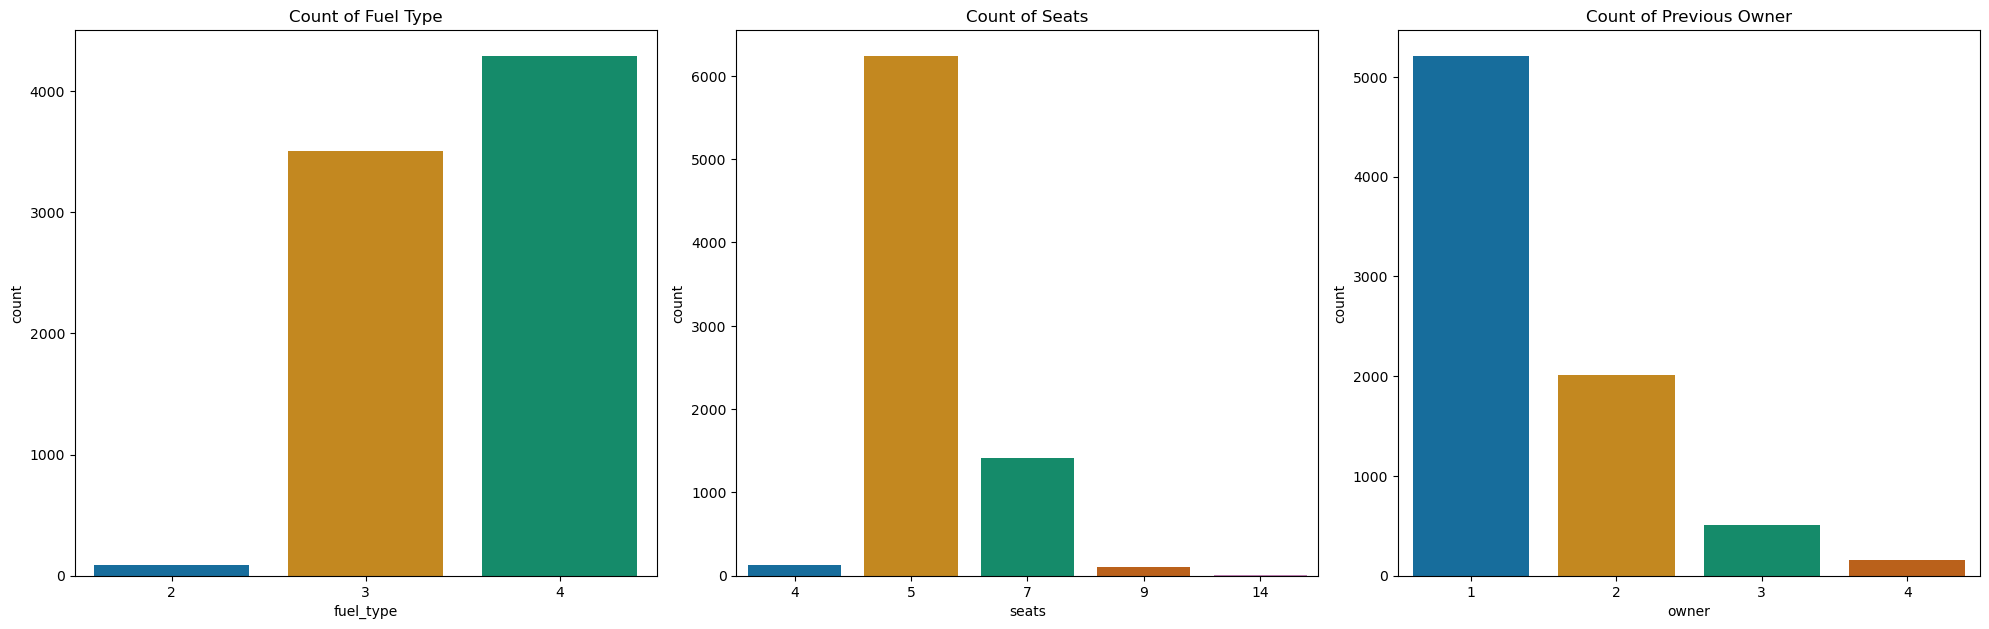

In [16]:
#Bar plots for each categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.countplot(x='fuel_type', data=data, palette='colorblind')
plt.title('Count of Fuel Type')

plt.subplot(2, 3, 2)
sns.countplot(x='seats', data=data, palette='colorblind')
plt.title('Count of Seats')

plt.subplot(2, 3, 3)
sns.countplot(x='owner', data=data, palette='colorblind')
plt.title('Count of Previous Owner')

plt.tight_layout()
plt.show()

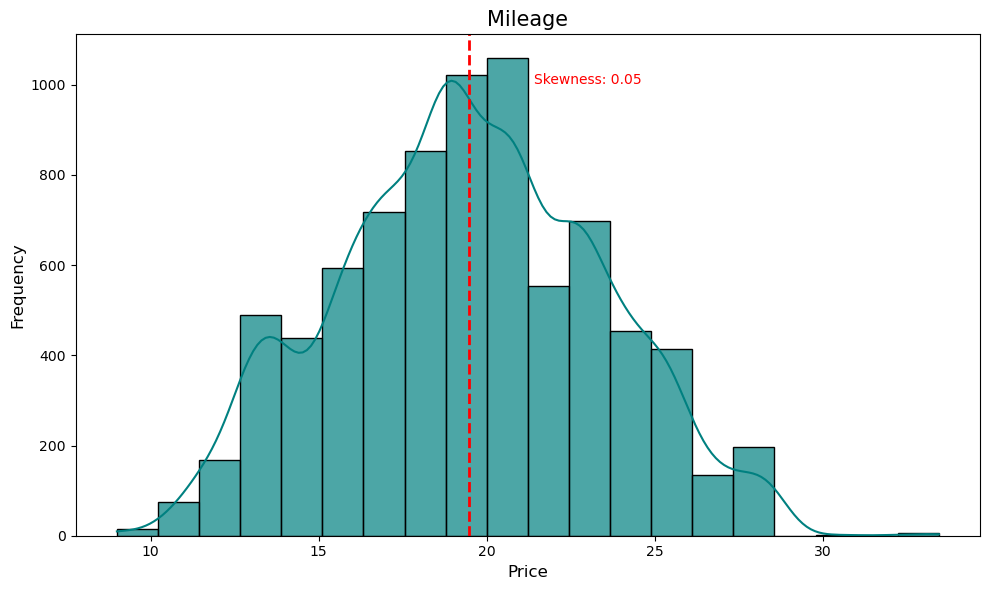

In [17]:
from scipy.stats import skew
#Plot histogram
mileage_skewness = skew(data['mileage'])
plt.figure(figsize=(10, 6))
sns.histplot(data['mileage'], bins=20, kde=True, color='teal', alpha=0.7)
plt.title('Mileage', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(False)

#Add skewness line
plt.axvline(data['mileage'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.text(data['mileage'].mean() * 1.1, plt.gca().get_ylim()[1] * 0.9,
         f'Skewness: {mileage_skewness:.2f}',
         color='red')

plt.tight_layout()
plt.show()

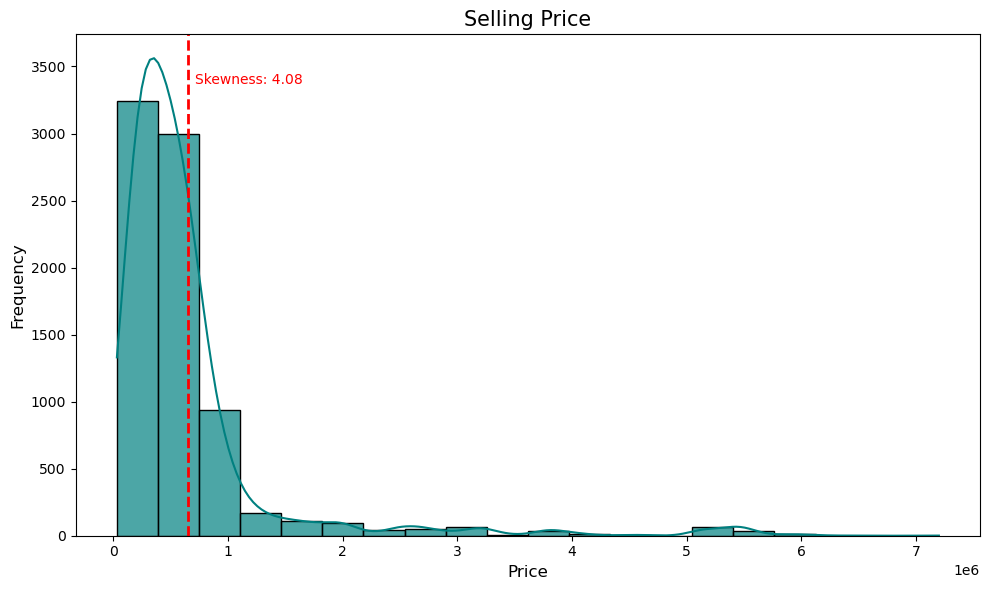

In [18]:
#data['selling_price'].hist(figsize=(10, 6))
#plt.tight_layout()
#plt.show()

#Plot histogram
selling_price_skewness = skew(data['selling_price'])
plt.figure(figsize=(10, 6))
sns.histplot(data['selling_price'], bins=20, kde=True, color='teal', alpha=0.7)
plt.title('Selling Price', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(False)

#Add skewness line
plt.axvline(data['selling_price'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.text(data['selling_price'].mean() * 1.1, plt.gca().get_ylim()[1] * 0.9,
         f'Skewness: {selling_price_skewness:.2f}',
         color='red')

plt.tight_layout()
plt.show()

In [19]:
data['log_price'] = np.log(data['selling_price'])

C:\Users\laugh\AppData\Local\Temp\ipykernel_11756\3655127641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_price'] = np.log(data['selling_price'])


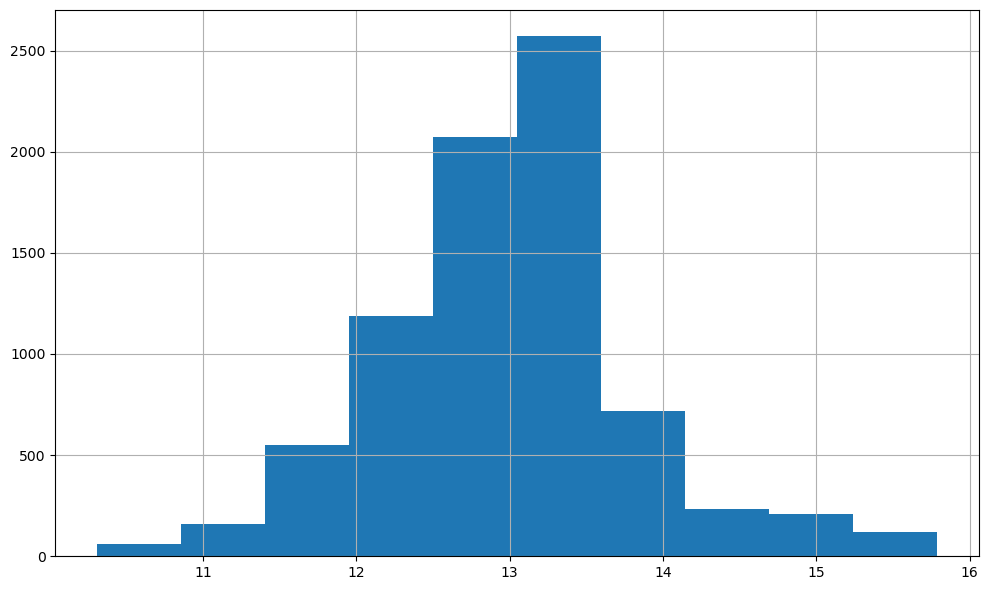

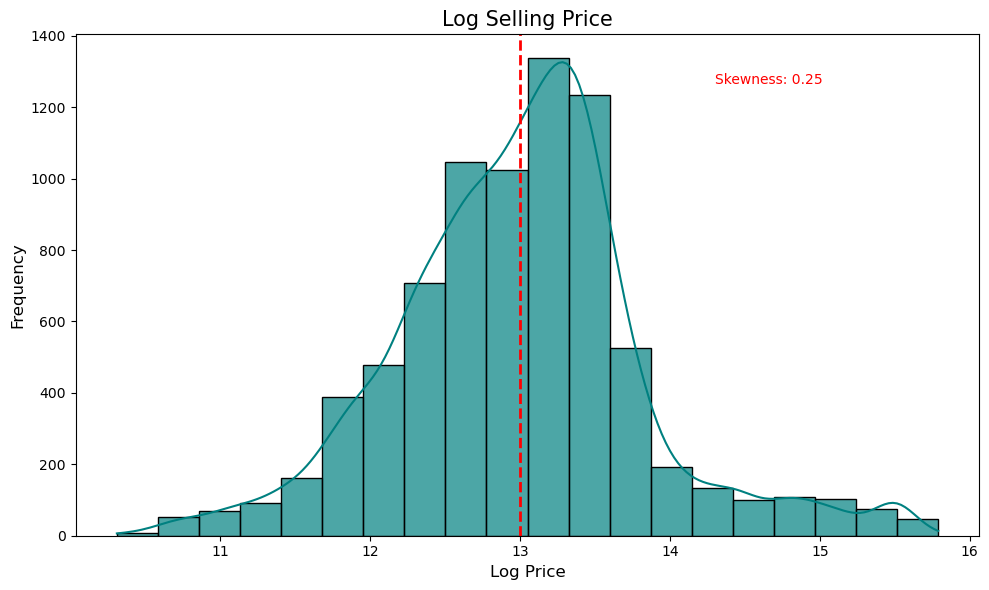

In [20]:
data.head(10)
data['log_price'].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

#Plot histogram
selling_price_skewness = skew(data['log_price'])
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=20, kde=True, color='teal', alpha=0.7)
plt.title('Log Selling Price', fontsize=15)
plt.xlabel('Log Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(False)

#Add skewness line
plt.axvline(data['log_price'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.text(data['log_price'].mean() * 1.1, plt.gca().get_ylim()[1] * 0.9,
         f'Skewness: {selling_price_skewness:.2f}',
         color='red')

plt.tight_layout()
plt.show()

In [21]:
data.drop(columns=['model_year'], inplace=True)
data.head(5)

C:\Users\laugh\AppData\Local\Temp\ipykernel_11756\1066296696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['model_year'], inplace=True)


,record,name,selling_price,vehicle_age,km_driven,seats,fuel_type,seller_type,transmission,owner,mileage,engine,max_power,brand,class,log_price
0,1,Maruti Ritz VDi,425000,5,70000,5,4,1,2,1,23.20,1248,73,Maruti,compact,12.959844
1,2,Hyundai Grand i10 1.2 CRDi Sportz,700000,3,35000,5,4,1,2,1,24.00,1186,73,Hyundai,compact,13.458836
2,3,Tata Indigo eCS LX BSIV,210000,10,175000,5,4,1,2,2,23.03,1396,69,Tata,compact,12.254863
3,4,Toyota Etios VX,625000,4,25538,5,3,3,2,1,16.78,1496,88,Toyota,C1C2,13.345507
4,5,Tata Hexa XM,1300000,3,35000,7,4,1,2,1,17.60,2179,153,Tata,E,14.077875


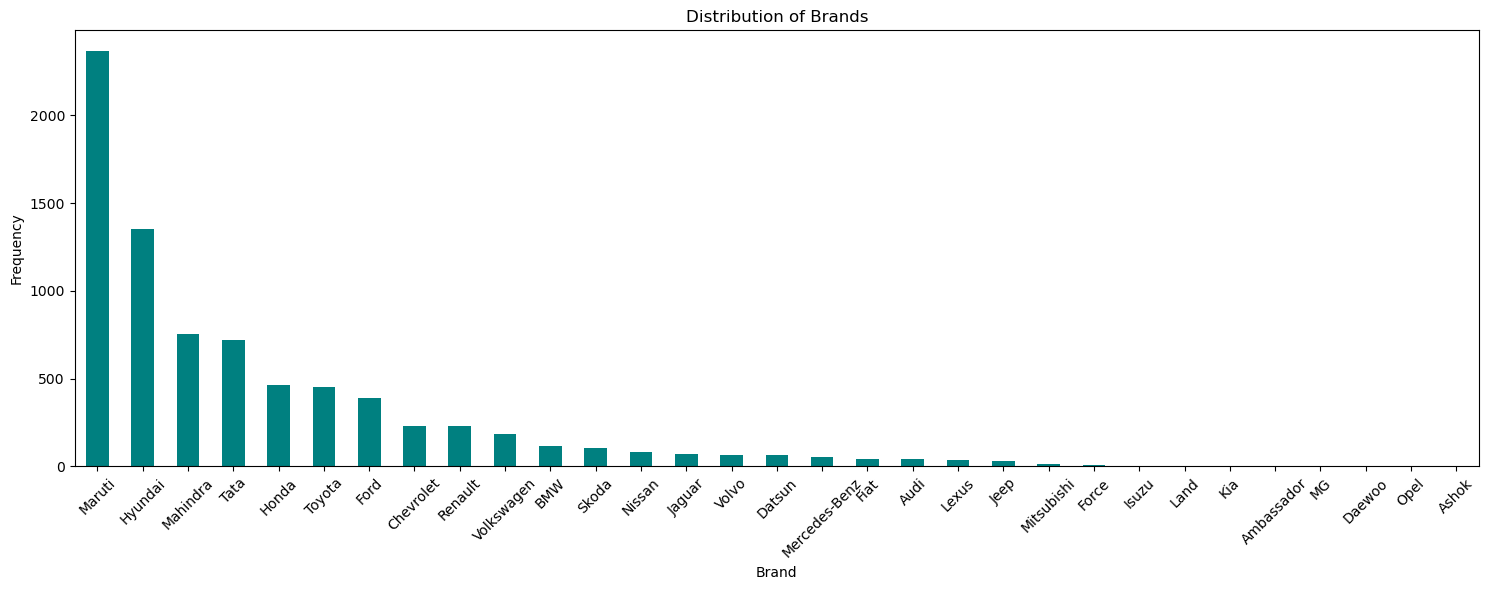

In [22]:
plt.figure(figsize=(15, 6))
data['brand'].value_counts().plot(kind='bar', color='teal')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Distribution of Brands')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

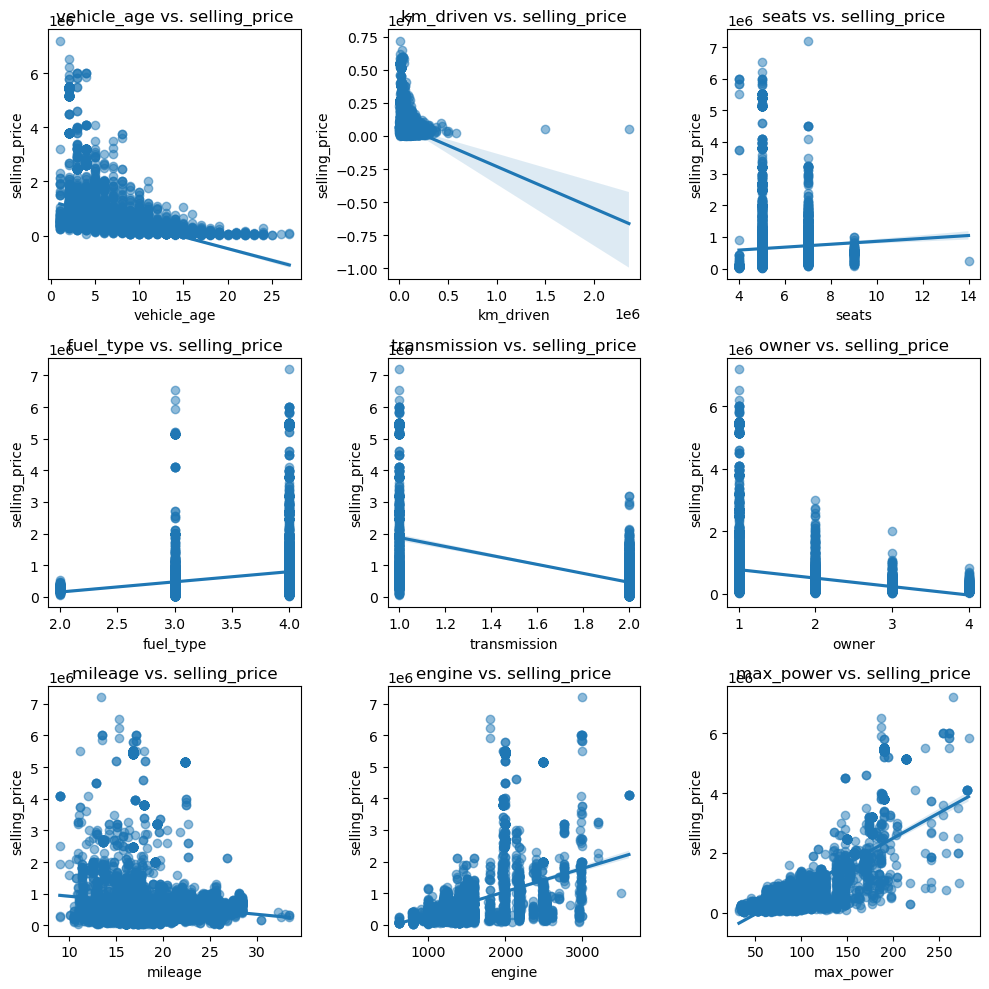

In [23]:
#sns.pairplot(data, x_vars=['vehicle_age', 'km_driven', 'seats', 'fuel_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power'],
#             y_vars=['selling_price'], kind='scatter', hue='category_column', ci=None, height=6, aspect=2)
x_vars = ['vehicle_age', 'km_driven', 'seats', 'fuel_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power']
y_var = 'selling_price'

#Create pairplot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, x_var in enumerate(x_vars):
    row = i // 3
    col = i % 3
    sns.regplot(x=x_var, y=y_var, data=data, ax=axes[row, col], scatter_kws={'alpha':0.5})
    axes[row, col].set_title(f'{x_var} vs. {y_var}')
    axes[row, col].set_xlabel(x_var)
    axes[row, col].set_ylabel(y_var)

plt.tight_layout()
plt.show()

# MODEL BUILDING

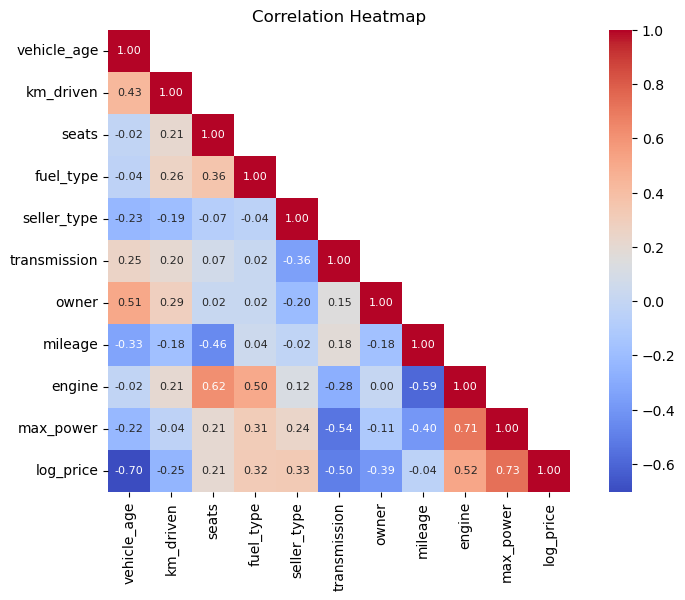

In [24]:
data_drop = data.drop(columns=['record', 'name', 'class', 'brand', 'selling_price'])  # Drop columns 'record' and 'name'
correlation_matrix = data_drop.corr()  # Calculate correlation matrix

annot_kws = {"fontsize": 8}
symmetric_matrix = (correlation_matrix + correlation_matrix.T) / 2

#Create a mask for the upper half of the matrix
mask = np.triu(np.ones_like(symmetric_matrix), k=1)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, mask=mask, square=True, cmap='coolwarm', fmt=".2f", annot_kws=annot_kws)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
#Create an empty DataFrame to store the dummy variables
transmission_dummy = pd.DataFrame()

#Create dummy variables manually
transmission_dummy['transmission_1'] = (data['transmission'] == 1).astype(int)
transmission_dummy['transmission_2'] = (data['transmission'] == 2).astype(int)

#Concatenate dummy variables with the original DataFrame
transmission_dummy = transmission_dummy.astype(int)
data_dummy1 = pd.concat([data, transmission_dummy], axis=1)

#Drop the original categorical variable from the DataFrame
data_dummy1.drop(columns=['transmission'], inplace=True)

data_dummy1.head(5)

,record,name,selling_price,vehicle_age,km_driven,seats,fuel_type,seller_type,owner,mileage,engine,max_power,brand,class,log_price,transmission_1,transmission_2
0,1,Maruti Ritz VDi,425000,5,70000,5,4,1,1,23.20,1248,73,Maruti,compact,12.959844,0,1
1,2,Hyundai Grand i10 1.2 CRDi Sportz,700000,3,35000,5,4,1,1,24.00,1186,73,Hyundai,compact,13.458836,0,1
2,3,Tata Indigo eCS LX BSIV,210000,10,175000,5,4,1,2,23.03,1396,69,Tata,compact,12.254863,0,1
3,4,Toyota Etios VX,625000,4,25538,5,3,3,1,16.78,1496,88,Toyota,C1C2,13.345507,0,1
4,5,Tata Hexa XM,1300000,3,35000,7,4,1,1,17.60,2179,153,Tata,E,14.077875,0,1


In [26]:
#Create dummy for all categorical (owner)
owner_dummy = pd.get_dummies(data_dummy1['owner'], prefix='owner', drop_first=False)

#Concatenate dummy variables
owner_dummy = owner_dummy.astype(int)
data_dummy2 = pd.concat([data_dummy1, owner_dummy], axis=1)

#Drop the original categorical variable
#data_dummy2.drop(columns=['owner'], inplace=True)

data_dummy2.head(5)

,record,name,selling_price,vehicle_age,km_driven,seats,fuel_type,seller_type,owner,mileage,...,max_power,brand,class,log_price,transmission_1,transmission_2,owner_1,owner_2,owner_3,owner_4
0,1,Maruti Ritz VDi,425000,5,70000,5,4,1,1,23.20,...,73,Maruti,compact,12.959844,0,1,1,0,0,0
1,2,Hyundai Grand i10 1.2 CRDi Sportz,700000,3,35000,5,4,1,1,24.00,...,73,Hyundai,compact,13.458836,0,1,1,0,0,0
2,3,Tata Indigo eCS LX BSIV,210000,10,175000,5,4,1,2,23.03,...,69,Tata,compact,12.254863,0,1,0,1,0,0
3,4,Toyota Etios VX,625000,4,25538,5,3,3,1,16.78,...,88,Toyota,C1C2,13.345507,0,1,1,0,0,0
4,5,Tata Hexa XM,1300000,3,35000,7,4,1,1,17.60,...,153,Tata,E,14.077875,0,1,1,0,0,0


In [27]:
#use base of fuel type with either fuel 3 ot fuel 4

#Create an empty DataFrame to store the dummy variables
fuel_type_dummy = pd.DataFrame()

#Create dummy variables manually
fuel_type_dummy['fuel_type_2'] = (data_dummy2['fuel_type'] == 2).astype(int)
fuel_type_dummy['fuel_type_3'] = (data_dummy2['fuel_type'] == 3).astype(int)
fuel_type_dummy['fuel_type_4'] = (data_dummy2['fuel_type'] == 4).astype(int)

#Concatenate dummy variables with the original DataFrame
data_dummy3 = pd.concat([data_dummy2, fuel_type_dummy], axis=1)

#Drop the original categorical variable from the DataFrame
data_dummy3.drop(columns=['fuel_type'], inplace=True)

data_dummy3.head()

,record,name,selling_price,vehicle_age,km_driven,seats,seller_type,owner,mileage,engine,...,log_price,transmission_1,transmission_2,owner_1,owner_2,owner_3,owner_4,fuel_type_2,fuel_type_3,fuel_type_4
0,1,Maruti Ritz VDi,425000,5,70000,5,1,1,23.20,1248,...,12.959844,0,1,1,0,0,0,0,0,1
1,2,Hyundai Grand i10 1.2 CRDi Sportz,700000,3,35000,5,1,1,24.00,1186,...,13.458836,0,1,1,0,0,0,0,0,1
2,3,Tata Indigo eCS LX BSIV,210000,10,175000,5,1,2,23.03,1396,...,12.254863,0,1,0,1,0,0,0,0,1
3,4,Toyota Etios VX,625000,4,25538,5,3,1,16.78,1496,...,13.345507,0,1,1,0,0,0,0,1,0
4,5,Tata Hexa XM,1300000,3,35000,7,1,1,17.60,2179,...,14.077875,0,1,1,0,0,0,0,0,1


In [30]:
data_dummy4 = data_dummy3

#Create interaction terms
data_dummy4['mileage_type_1'] = data_dummy4['mileage'] * data_dummy4['owner_1']
data_dummy4['mileage_type_2'] = data_dummy4['mileage'] * data_dummy4['owner_2']
data_dummy4['mileage_type_3'] = data_dummy4['mileage'] * data_dummy4['owner_3']
data_dummy4['mileage_type_4'] = data_dummy4['mileage'] * data_dummy4['owner_4']

In [31]:
#Create dummy for all categorical (seats)
seats_dummy = pd.DataFrame()

#Create dummy variables manually
seats_dummy['seats_4'] = (data_dummy4['seats'] == 4).astype(int)
seats_dummy['seats_5'] = (data_dummy4['seats'] == 5).astype(int)
seats_dummy['seats_7'] = (data_dummy4['seats'] == 7).astype(int)
seats_dummy['seats_9'] = (data_dummy4['seats'] == 9).astype(int)

#Concatenate dummy variables 
data_dummy5 = pd.concat([data_dummy4, seats_dummy], axis=1)

data_dummy5.drop(columns=['seats'], inplace=True)

data_dummy5.head()

,record,name,selling_price,vehicle_age,km_driven,seller_type,owner,mileage,engine,max_power,...,fuel_type_3,fuel_type_4,mileage_type_1,mileage_type_2,mileage_type_3,mileage_type_4,seats_4,seats_5,seats_7,seats_9
0,1,Maruti Ritz VDi,425000,5,70000,1,1,23.20,1248,73,...,0,1,23.20,0.00,0.0,0.0,0,1,0,0
1,2,Hyundai Grand i10 1.2 CRDi Sportz,700000,3,35000,1,1,24.00,1186,73,...,0,1,24.00,0.00,0.0,0.0,0,1,0,0
2,3,Tata Indigo eCS LX BSIV,210000,10,175000,1,2,23.03,1396,69,...,0,1,0.00,23.03,0.0,0.0,0,1,0,0
3,4,Toyota Etios VX,625000,4,25538,3,1,16.78,1496,88,...,1,0,16.78,0.00,0.0,0.0,0,1,0,0
4,5,Tata Hexa XM,1300000,3,35000,1,1,17.60,2179,153,...,0,1,17.60,0.00,0.0,0.0,0,0,1,0


# FULL MODEL

In [32]:
x = data_dummy5[['vehicle_age', 'km_driven', 'mileage','max_power', 'transmission_1',
                 'owner_2',	'owner_3', 'fuel_type_2','fuel_type_4',
                 'seats_4', 'seats_7', 'seats_9']]
y = data_dummy5['log_price']
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     4149.
Date:                Fri, 28 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:04:59   Log-Likelihood:                -1832.7
No. Observations:                7888   AIC:                             3691.
Df Residuals:                    7875   BIC:                             3782.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.5622      0.040    316.

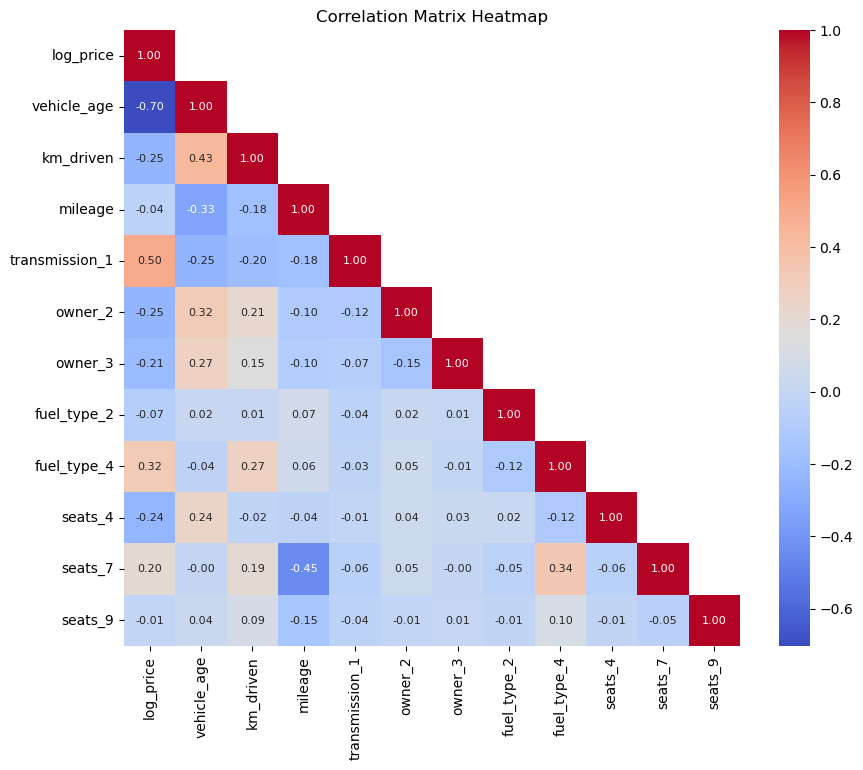

In [42]:
data_check = data_dummy5[['log_price', 'vehicle_age', 'km_driven', 'mileage', 'transmission_1', 'max_power'
                          'owner_2', 'owner_3', 'fuel_type_2','fuel_type_4', 
                          'seats_4', 'seats_7', 'seats_9']]
correlation_matrix7 = data_check.corr()

#Print the correlation matrix
#print(correlation_matrix7)

#Create a mask for the upper half of the matrix
mask1 = np.triu(np.ones_like(correlation_matrix7), k=1)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix7, mask=mask1, square=True, annot=True, cmap='coolwarm', fmt=".2f", annot_kws=annot_kws)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [44]:
x1 = data_dummy5[['km_driven', 'transmission_1', 'vehicle_age',
                  'owner_2','owner_3', 'owner_4', 'fuel_type_4', 
                  'seats_4', 'seats_7']]
y1 = data_dummy5['log_price']
model1 = sm.OLS(y1, sm.add_constant(x1)).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2303.
Date:                Fri, 28 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:06:02   Log-Likelihood:                -4598.4
No. Observations:                7888   AIC:                             9217.
Df Residuals:                    7878   BIC:                             9287.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.4741      0.013   1062.

# ASSUMPTION CHECK

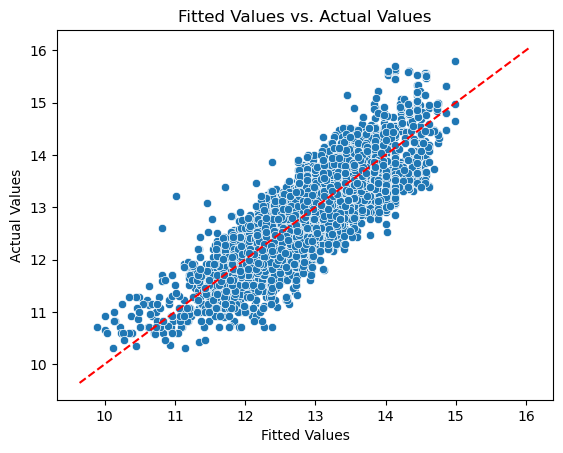

In [45]:
#Assumption 1: Linearity
#Plot the predicted values vs. the actual values
sns.scatterplot(x=model1.fittedvalues, y=data_dummy5['log_price'])
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs. Actual Values')

#Add a diagonal dotted red line
lims = [np.min([plt.gca().get_xlim(), plt.gca().get_ylim()]), np.max([plt.gca().get_xlim(), plt.gca().get_ylim()])]
plt.plot(lims, lims, 'r--')

plt.show()

In [46]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Assumption 2: Independence
#Perform the Durbin-Watson test
dw_statistic = durbin_watson(model1.resid)
print('Durbin-Watson statistic:', dw_statistic)

Durbin-Watson statistic: 1.9940857855811702


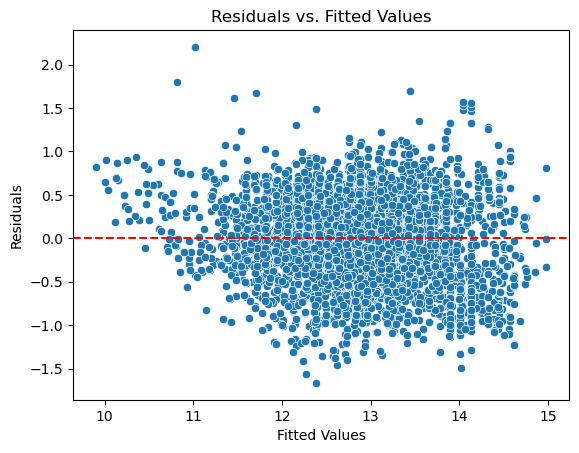

In [47]:
#Assumption 3: Homoscedasticity
#Plot the residuals vs. the fitted values again
sns.scatterplot(x=model1.fittedvalues, y=model1.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [48]:
#Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model1.resid, model1.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 1439.2548360159665, 'p-value': 2.547595543808745e-304, 'f-value': 195.36013613346978, 'f p-value': 0.0}


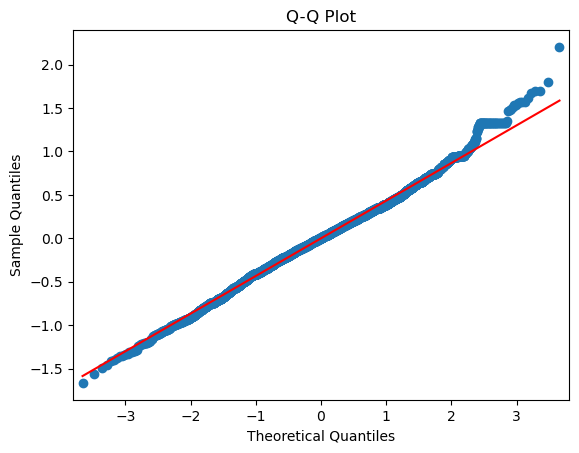

In [49]:
#Assumption 4: Normality
#Plot a Q-Q plot
sm.qqplot(model1.resid, line='s')
plt.title('Q-Q Plot')
plt.show()

Text(0.95, 0.95, 'Skewness: 0.07')

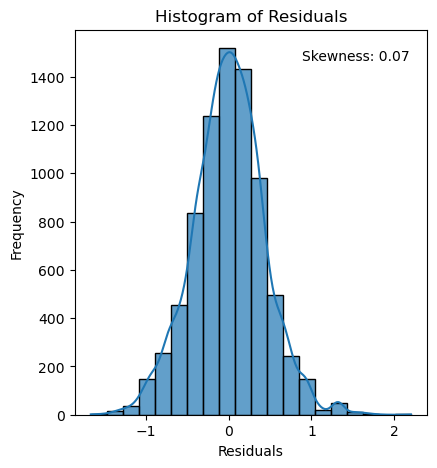

In [50]:
from scipy.stats import skew
residuals = model1.resid

#Histogram
residuals_skewness = skew(residuals)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=20, kde=True, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.text(0.95, 0.95, f'Skewness: {residuals_skewness:.2f}',
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes)

In [52]:
from tabulate import tabulate

#Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = x1.columns
vif_data['VIF'] = [round(variance_inflation_factor(x1.values, i),2) for i in range(x1.shape[1])]

#Print VIF data 
print(tabulate(vif_data, headers='keys', tablefmt='pretty'))

+---+----------------+------+
|   |    Variable    | VIF  |
+---+----------------+------+
| 0 |   km_driven    | 3.51 |
| 1 | transmission_1 | 1.09 |
| 2 |  vehicle_age   | 4.19 |
| 3 |    owner_2     | 1.68 |
| 4 |    owner_3     | 1.26 |
| 5 |    owner_4     | 1.1  |
| 6 |  fuel_type_4   | 2.31 |
| 7 |    seats_4     | 1.11 |
| 8 |    seats_7     | 1.4  |
+---+----------------+------+


# Results

The price of cars is affected by:
1. As vehicle age increase by 1 year, selling price of car decreases by around 12%.
2. Automatic transmission cars has around 89% increase in price compared to manual cars.
3. Bigger cars tend to have higher price. The base dummy for car seats is 5 seater. Based on the model, 7 seater price is around 29% more expensive than a 5 seater. This might be due to higher tendency of population prefer spacious cars for their children or pets. 